 # import libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")

# Top 5 rows of the dataset

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# last 5 rows of the dataset

In [4]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


# shape of our dataset

In [5]:
data.shape

(1025, 14)

In [6]:
print("Number of Rows",data.shape[0])
print("Number of Columns",data.shape[1])

Number of Rows 1025
Number of Columns 14


# get information about dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# check null values in the dataset

In [10]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# check for duplicate data and drop them

In [11]:
data_dup= data.duplicated().any()
print(data_dup)

True


In [12]:
data = data.drop_duplicates()

In [13]:
data.shape

(302, 14)

# Overall statics about the dataset

In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# How many people have heart disease and how many don't have

In [15]:
data["target"].value_counts()

target
1    164
0    138
Name: count, dtype: int64

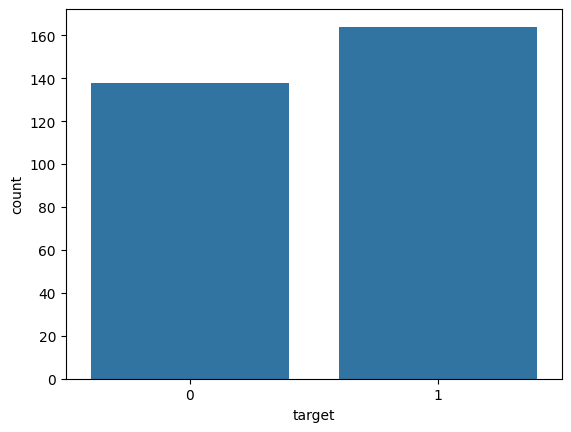

In [24]:
sns.countplot(x=data["target"])
plt.show()

# which sex have the most heart disease[male or felmale]

In [25]:
data["sex"].value_counts()

sex
1    206
0     96
Name: count, dtype: int64

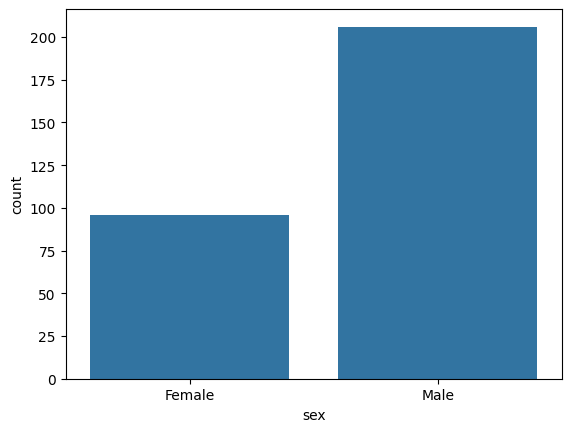

In [31]:
sns.countplot(x=data["sex"])
plt.xticks([0,1],['Female','Male'])
plt.show()

# Gender distribution according to the target variable

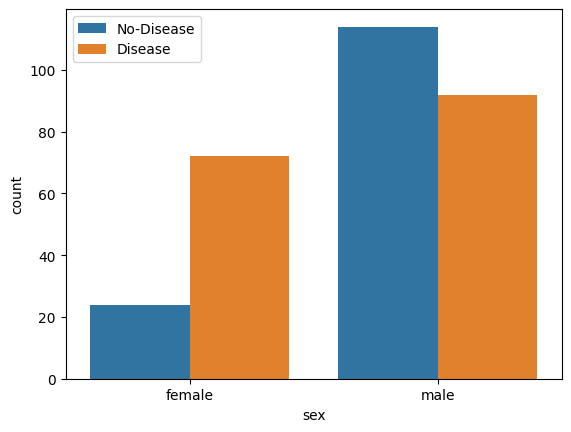

In [34]:
sns.countplot(x='sex',hue="target",data = data)
plt.xticks([1,0],['male','female'])
plt.legend(labels=['No-Disease','Disease'])
plt.show()

# check age distribution 

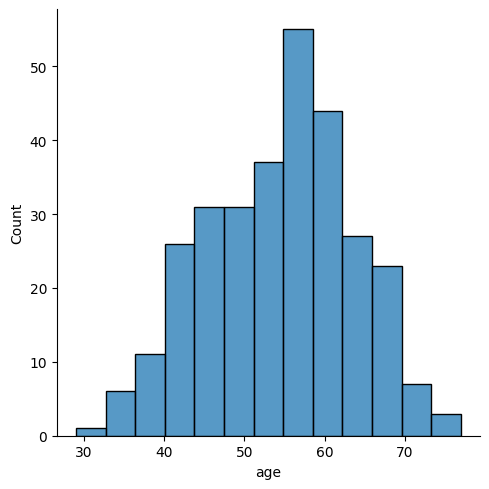

In [38]:
sns.displot(data['age'])
plt.show()

# check chest pain type

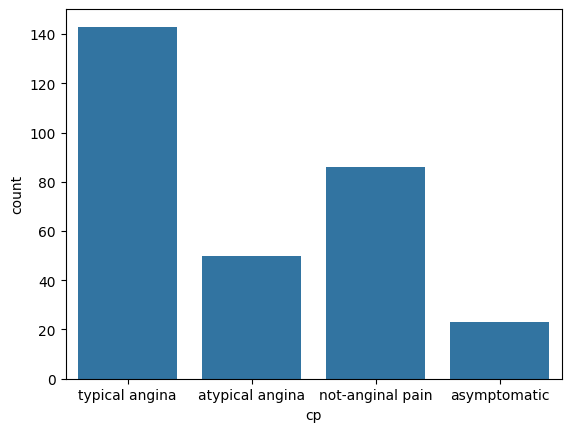

In [40]:
sns.countplot(x=data['cp'])
plt.xticks([0,1,2,3],["typical angina","atypical angina","not-anginal pain","asymptomatic"])
plt.show()

# chest pain distribution as per target variable

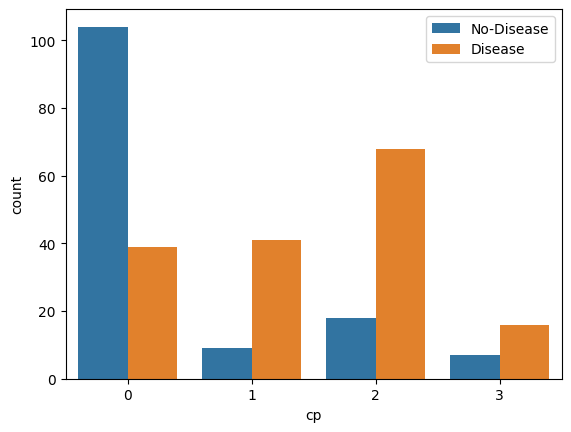

In [41]:
sns.countplot(x="cp",hue="target",data = data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

# fasting Blood Sugar distribution according to target variable

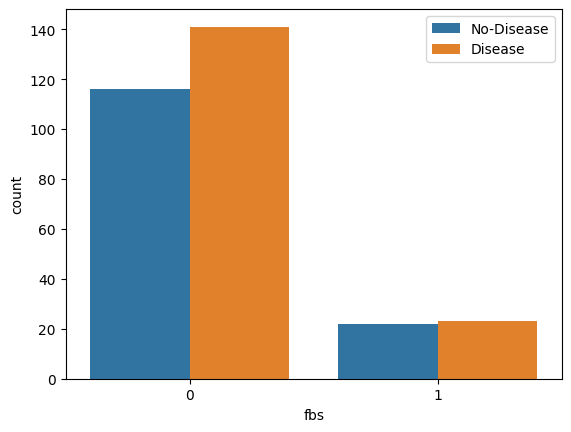

In [42]:
sns.countplot(x="fbs",hue="target",data = data)
plt.legend(labels=["No-Disease","Disease"])
plt.show()

# Check Resting blood pressure distribution 

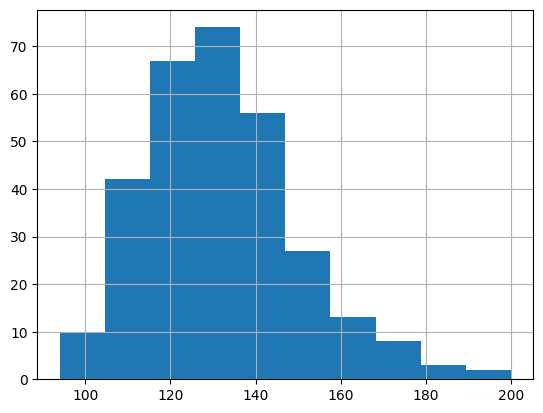

In [43]:
data["trestbps"].hist()
plt.show()

# compare resting blood pressure as per sex columns

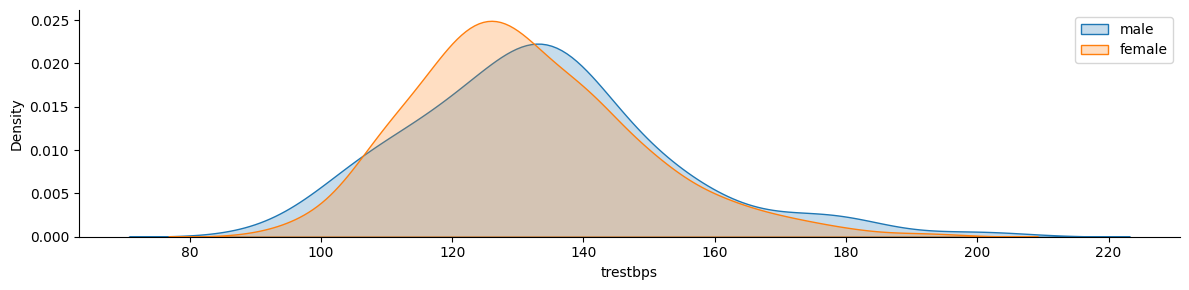

In [49]:
g= sns.FacetGrid(data,hue="sex",aspect=4)
g.map(sns.kdeplot,'trestbps',fill=True)
plt.legend(labels=['male','female'])
plt.show()

# distribution of serum cholesterol

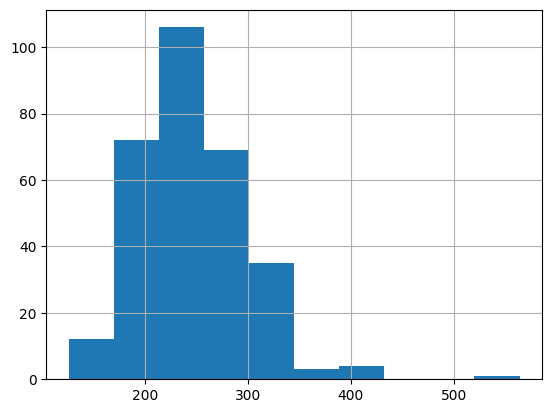

In [50]:
data['chol'].hist()
plt.show()